#NAMA : FATHURRAHMAN NUR AZIZ
#NIM : 20.11.3694

#Week 12 - CLUSTERING EVAL

#IMPLEMENTASI 1 - spectral data

##1. Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

##2. Generate Data

In [2]:
X,y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

##3. EDA

In [3]:
#print top 5 data
print('Nilai X: \n',X[:5])

#print top 5 cluster
print('Cluster: \n',y[:5])

Nilai X: 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]
Cluster: 
 [0 1 1 1 1]


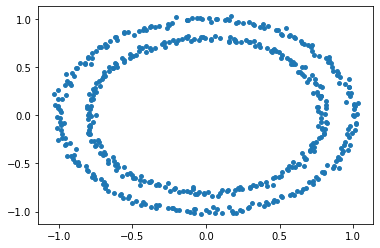

In [4]:
plt.scatter(X[:,0], X[:,1], s=15)
plt.show()

##4. KMeans

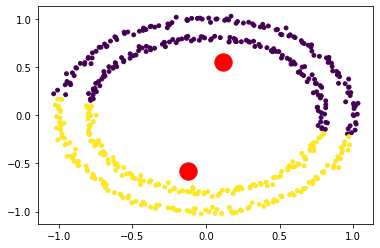

In [5]:
kmeans_cluster= KMeans(n_clusters=2, init='k-means++', max_iter=300,
                       n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='r')
plt.show()

##5. DBSCAN Cluster

In [6]:
#create eps and min samples combination
eps_values = np.arange(0.02,0.3,0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values,min_samples))

In [7]:
#list contains looping res
no_of_clusters = []
epsvalues = []
min_samp = []

#iteration over combination
for p in dbscan_params:
  #create a dbscan cluster based on a combinatin of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  if len(np.unique(dbscan_cluster.labels_)) <=1:
    pass
  else: 
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [8]:
 eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
 eps_min_df = pd.DataFrame(eps_min,columns=['no_of_clusters', 'epsilon_values', 'minimun_points'])

 eps_min_df.head()

,no_of_clusters,epsilon_values,minimun_points
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3


In [9]:
'''
karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari 
beberapa kombinasi parameter eops dan min_pts
'''
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimun_points
2,2,0.02,4
18,2,0.08,2
19,2,0.08,3
20,2,0.08,4
21,2,0.09,2
22,2,0.09,3
23,2,0.09,4
24,2,0.10,2
25,2,0.10,3
26,2,0.10,4


###create cluster

In [10]:
dbscan_cluster=DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

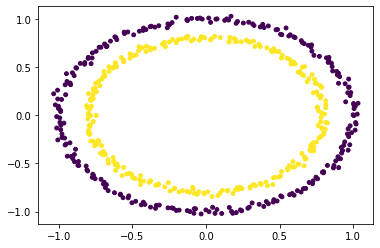

In [11]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

##5. cluster eval

###davies bouldin index DBI

In [12]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI Kmeans Score: ', dbi_kmeans)
print('DBI DBSCAN Score: ', dbi_dbscan)

DBI Kmeans Score:  1.1413660912854755
DBI DBSCAN Score:  690.8008186438688


###silhouette score

In [13]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score Kmeans score: ', sil_kmeans)
print('Silhouette Score DBSCAN score: ', sil_dbscan)

Silhouette Score Kmeans score:  0.4009108760935593
Silhouette Score DBSCAN score:  0.0183945519188842


##rand index

In [14]:
from sklearn.metrics import rand_score

rand_score_kmeans=rand_score(y, kmeans_result)
rand_score_dbscan=rand_score(y, dbscan_result)

print('rand Score of Kmeans: ', rand_score_kmeans)
print('rand Score of DBSCAN: ', rand_score_dbscan)

rand Score of Kmeans:  0.4990060120240481
rand Score of DBSCAN:  1.0


#homogeneity score

In [15]:
from sklearn.metrics import homogeneity_score
homogeneity_score_kmeans=homogeneity_score(y,kmeans_result)
homogeneity_score_dbscan=homogeneity_score(y,dbscan_result)

print('homogeneity Score of Kmeans: ', homogeneity_score_kmeans)
print('homogeneity Score of DBSCAN: ', homogeneity_score_dbscan)

homogeneity Score of Kmeans:  1.154325335452816e-05
homogeneity Score of DBSCAN:  1.0


#completeness score

In [16]:
from sklearn.metrics import completeness_score
completeness_score_kmeans=completeness_score(y,kmeans_result)
completeness_score_dbscan=completeness_score(y,dbscan_result)

print('completeness Score of Kmeans: ', completeness_score_kmeans)
print('completeness Score of DBSCAN: ', completeness_score_dbscan)

completeness Score of Kmeans:  1.1544452552270064e-05
completeness Score of DBSCAN:  1.0


#v measure score

In [17]:
from sklearn.metrics import v_measure_score
v_measure_score_kmeans=v_measure_score(y,kmeans_result)
v_measure_score_dbscan=v_measure_score(y,dbscan_result)

print('v_measure_score of Kmeans: ', v_measure_score_kmeans)
print('v_measure_score of DBSCAN: ', v_measure_score_dbscan)

v_measure_score of Kmeans:  1.1543852922255368e-05
v_measure_score of DBSCAN:  1.0


#IMPLEMENTASI 2

##2. Generate Data

In [18]:
X,y = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=0)

##3. EDA

In [19]:
#print top 5 data
print('Nilai X: \n',X[:5])

#print top 5 cluster
print('Cluster: \n',y[:5])

Nilai X: 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]
Cluster: 
 [1 1 0 0 1]


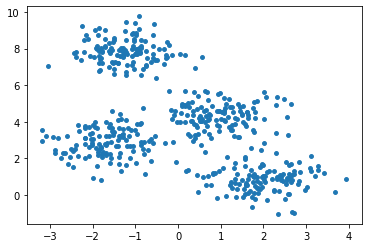

In [20]:
plt.scatter(X[:,0], X[:,1], s=15)
plt.show()

##4. KMeans

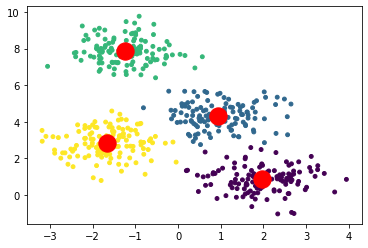

In [21]:
kmeans_cluster= KMeans(n_clusters=4, init='k-means++', max_iter=300,
                       n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='r')
plt.show()

##5. DBSCAN Cluster

In [22]:
#create eps and min samples combination
eps_values = np.arange(0.1,1.0,0.1)
min_samples = np.arange(5,10)
dbscan_params = list(product(eps_values,min_samples))

In [23]:
#list contains looping res
no_of_clusters = []
epsvalues = []
min_samp = []

#iteration over combination
for p in dbscan_params:
  #create a dbscan cluster based on a combinatin of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  if len(np.unique(dbscan_cluster.labels_)) <=1:
    break
  else: 
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [24]:
 eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
 eps_min_df = pd.DataFrame(eps_min,columns=['no_of_clusters', 'epsilon_values', 'minimun_points'])

 eps_min_df

,no_of_clusters,epsilon_values,minimun_points
0,6,0.1,5


In [25]:
'''
karena tujuannya menghasilkan cluster == 5,
maka dapat menggunakan salah satu dari 
beberapa kombinasi parameter eops dan min_pts
'''
eps_min_df[eps_min_df['no_of_clusters']==5]

,no_of_clusters,epsilon_values,minimun_points


###create cluster

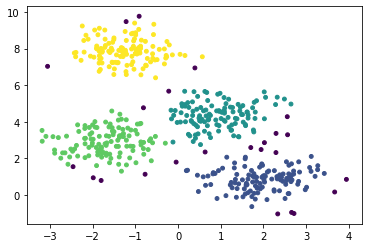

In [26]:
dbscan_cluster=DBSCAN(eps=0.5, min_samples=6)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

##5. cluster eval

###davies bouldin index DBI

In [27]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI Kmeans Score: ', dbi_kmeans)
print('DBI DBSCAN Score: ', dbi_dbscan)

DBI Kmeans Score:  0.5120623635610269
DBI DBSCAN Score:  1.949002068918896


###silhouette score

In [28]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score Kmeans score: ', sil_kmeans)
print('Silhouette Score Kmeans score: ', sil_dbscan)

Silhouette Score Kmeans score:  0.6322199807775134
Silhouette Score Kmeans score:  0.5953553670533912


#implementasi 3 - moon

In [29]:
X,y = datasets.make_moons(n_samples=150, shuffle=True, noise=0.02, random_state=None)

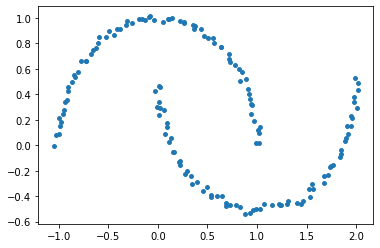

In [30]:
plt.scatter(X[:,0], X[:,1], s=15)
plt.show()

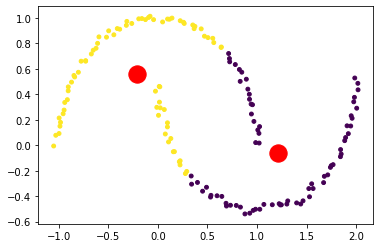

In [47]:
kmeans_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], s=300, c='r', label='Centroids')

plt.show()

In [55]:
#create eps and min samples combination
eps_values = np.arange(0.1,1.0,0.1)
min_samples = np.arange(2,10)
dbscan_params = list(product(eps_values,min_samples))

In [56]:
#list contains looping res
no_of_clusters = []
epsvalues = []
min_samp = []

#iteration over combination
for p in dbscan_params:
  #create a dbscan cluster based on a combinatin of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  if len(np.unique(dbscan_cluster.labels_)) <=1:
    break
  else: 
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [57]:
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,columns=['no_of_clusters', 'epsilon_values', 'minimun_points'])

eps_min_df.head()

,no_of_clusters,epsilon_values,minimun_points
0,4,0.1,2
1,4,0.1,3
2,5,0.1,4
3,17,0.1,5
4,6,0.1,6


In [58]:
'''
karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari 
beberapa kombinasi parameter eops dan min_pts
'''
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimun_points


In [59]:
dbscan_cluster=DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

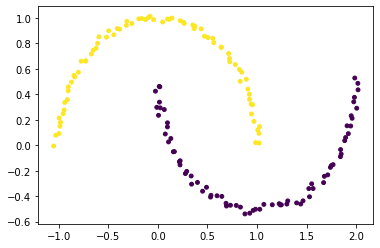

In [60]:
dbscan_cluster=DBSCAN(eps=0.4, min_samples=6)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

###davies bouldin index DBI

In [61]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI Kmeans Score: ', dbi_kmeans)
print('DBI DBSCAN Score: ', dbi_dbscan)

DBI Kmeans Score:  0.7763922914748587
DBI DBSCAN Score:  1.168288660861951


###silhouette score

In [62]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score Kmeans score: ', sil_kmeans)
print('Silhouette Score DBSCAN score: ', sil_dbscan)

Silhouette Score Kmeans score:  0.4877192341684135
Silhouette Score DBSCAN score:  0.3240337847581862


##rand index

In [63]:
from sklearn.metrics import rand_score

rand_score_kmeans=rand_score(y, kmeans_result)
rand_score_dbscan=rand_score(y, dbscan_result)

print('rand Score of Kmeans: ', rand_score_kmeans)
print('rand Score of DBSCAN: ', rand_score_dbscan)

rand Score of Kmeans:  0.6062639821029083
rand Score of DBSCAN:  1.0


##calinski

In [67]:
from sklearn.metrics import calinski_harabasz_score

calinski_score_kmeans=calinski_harabasz_score(X, kmeans_result)
calinski_score_dbscan=calinski_harabasz_score(X, dbscan_result)

print('rand Score of Kmeans: ', calinski_score_kmeans)
print('rand Score of DBSCAN: ', calinski_score_dbscan)

rand Score of Kmeans:  223.15290421884845
rand Score of DBSCAN:  96.3101133282933
